In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import os, os.path
import glob
import numpy
from scipy import ndimage
from galpy.util import bovy_conversion, bovy_plot
import gd1_util
import pal5_util
from gd1_util import R0, V0
import seaborn as sns
from matplotlib import cm, pyplot
%pylab inline
save_figures= False

/Users/bovy/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))

Populating the interactive namespace from numpy and matplotlib


# Mean changes to the stream density and track due to subhalo impacts

In [3]:
sdf_smooth= gd1_util.setup_gd1model()
sdf_smooth_pal5= pal5_util.setup_pal5model()

In [4]:
def plot_mean(filename,color=sns.color_palette()[0],zorder=4,ls='-',
              fill=False,fill_color='0.75',fill_zorder=0,sampling=False,
              smooth=False,save_figures=False):
    # Load the simulations
    data1= numpy.genfromtxt(filename,delimiter=',',max_rows=5002)
    # Search for batches
    batchfilenames= glob.glob(filename.replace('.dat','.*.dat'))
    for bfilename in batchfilenames:
        try:
            datab= numpy.genfromtxt(bfilename,delimiter=',')
        except: continue
        data1= numpy.vstack((data1,datab[2:]))
    apars= data1[0]
    data1[1:]*= bovy_conversion.freq_in_Gyr(V0,R0)
    nsim= len(data1)-2 # first two are apar and smooth
    plot(apars,numpy.median(data1[2:],axis=0),color=color,zorder=zorder,ls=ls)
    if smooth:
        # Also underplot smooth
        plot(apars,data1[1],color='k',zorder=zorder-1,ls=ls)
        if 'omega' in filename:
            if 'pal5' in filename:
                sO= numpy.array([sdf_smooth_pal5.sigOmega(da)*bovy_conversion.freq_in_Gyr(V0,R0) for da in apars])
            else:
                sO= numpy.array([sdf_smooth.sigOmega(da)*bovy_conversion.freq_in_Gyr(V0,R0) for da in apars])
            fill_between(apars,data1[1]-sO,data1[1]+sO,color=fill_color,zorder=0)
    if fill:
        data= data1[2:]
        data.sort(axis=0)
        low= data[int(numpy.round(0.25*nsim))]
        high= data[int(numpy.round(0.75*nsim))]
        fill_between(apars,low,high,color=fill_color,zorder=fill_zorder,alpha=0.5)
    if sampling:
        pmIndx= numpy.random.permutation(nsim)[:20]
        for pp in pmIndx:
            plot(apars,data1[2+pp],color='k',zorder=zorder-1,ls=ls,lw=0.5,alpha=0.5)
    return None
def set_ranges_and_labels(extended=False,pal5=False):
    subplot(1,2,1)
    xlabel(r'$\Delta\theta_\parallel$')
    bovy_plot.bovy_text(r'$\mathrm{density}$',
                        top_right=True,size=18.)
    if extended:
        if pal5:
            ylim(0.,57.5)
        else:
            ylim(0.,87.5)
    else:
        ylim(0.,47.5)
    if pal5:
        xlim(0.,1.8)
    else:
        xlim(0.,1.2)
    subplot(1,2,2)
    xlabel(r'$\Delta\theta_\parallel$')
    bovy_plot.bovy_text(r'$\Delta\Omega_\parallel\,(\mathrm{Gyr}^{-1})$',
                        top_left=True,size=18.)
    if extended:
        if pal5:
            ylim(0.,0.9)
        else:
            ylim(-0.3,0.5)
    else:
        if pal5:
            pass
        else:
            ylim(0.,0.2)
    if pal5:
        xlim(0.,1.8)
    else:
        xlim(0.,1.2)
    return None
def color_from_colormap(val,cmap,cmin,cmax):
    return cmap((val-cmin)/(cmax-cmin))
def add_colorbar(vmin,vmax,clabel,save_figures=False,fmt=r'$%.1f$'):
    fig= pyplot.gcf()
    if save_figures:
        fig.subplots_adjust(left=0.035,right=0.845,bottom=0.15,top=0.95,wspace=0.16)
        cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.8])
    else:
        fig.subplots_adjust(right=0.92)
        cbar_ax = fig.add_axes([0.945, 0.195, 0.03, 0.74])
    sm = pyplot.cm.ScalarMappable(cmap=cmap,norm=pyplot.Normalize(vmin=vmin,vmax=vmax))
    sm._A = []
    cbar= fig.colorbar(sm,cax=cbar_ax,use_gridspec=True,format=r'$%.1f$')
    cbar.set_label(clabel)
    return None

/Users/bovy/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))



In [5]:
basefilename= os.path.join(os.getenv('DATADIR'),'streamgap-pepper','gd1_multtime')

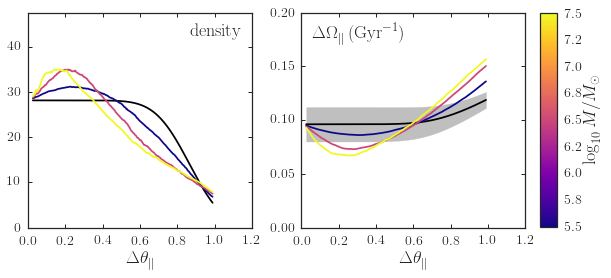

In [6]:
bovy_plot.bovy_print(axes_labelsize=18.,xtick_labelsize=14.,ytick_labelsize=14.)
cmap= cm.plasma
if save_figures:
    figsize(18/2.,4.25)
else:
    figsize(16/2.,4)
subplot(1,2,1)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X10_5.5_dens.dat'),
         fill=False,smooth=True,color=color_from_colormap(5.5,cmap,5.5,7.5))
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X10_6.5_dens.dat'),
         fill=False,color=color_from_colormap(6.5,cmap,5.5,7.5))
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X10_7.5_dens.dat'),
         fill=False,color=color_from_colormap(7.5,cmap,5.5,7.5))
subplot(1,2,2)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X10_5.5_omega.dat'),
         fill=False,smooth=True,color=color_from_colormap(5.5,cmap,5.5,7.5))
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X10_6.5_omega.dat'),
         fill=False,color=color_from_colormap(6.5,cmap,5.5,7.5))
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X10_7.5_omega.dat'),
         fill=False,color=color_from_colormap(7.5,cmap,5.5,7.5))
set_ranges_and_labels()
if not save_figures: tight_layout()
add_colorbar(5.5,7.5,r'$\log_{10} M/M_\odot$',save_figures=save_figures)
if save_figures:
    bovy_plot.bovy_end_print(os.path.join(os.getenv('PAPERSDIR'),'2016-stream-stats','gd1like_mean_massranges.pdf'))

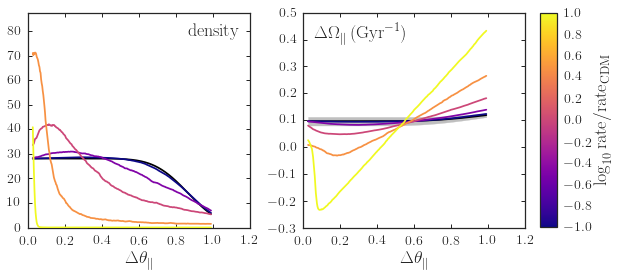

In [7]:
bovy_plot.bovy_print(axes_labelsize=18.,xtick_labelsize=14.,ytick_labelsize=14.)
cmap= cm.plasma
if save_figures:
    figsize(18/2.,4.25)
else:
    figsize(16/2.,4)
subplot(1,2,1)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_cdmp1_5-9_dens.dat'),
          fill=False,smooth=True,
          color=color_from_colormap(-1.,cmap,-1.,1.))
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_cdmp33_5-9_dens.dat'),
          fill=False,
          color=color_from_colormap(numpy.log10(0.333333333),cmap,-1.,1.))
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_5-9_dens.dat'),
          fill=False,
          color=color_from_colormap(0,cmap,-1.,1.))
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_cdm3_5-9_dens.dat'),
          fill=False,
          color=color_from_colormap(numpy.log10(3.),cmap,-1.,1.))
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_cdm10_5-9_dens.dat'),
          fill=False,
          color=color_from_colormap(1.,cmap,-1.,1.))
subplot(1,2,2)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_cdmp1_5-9_omega.dat'),
          fill=False,smooth=True,
          color=color_from_colormap(-1.,cmap,-1.,1.))
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_cdmp33_5-9_omega.dat'),
          fill=False,
          color=color_from_colormap(numpy.log10(0.333333333),cmap,-1.,1.))
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_5-9_omega.dat'),
          fill=False,
          color=color_from_colormap(0,cmap,-1.,1.))
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_cdm3_5-9_omega.dat'),
          fill=False,
          color=color_from_colormap(numpy.log10(3.),cmap,-1.,1.))
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_cdm10_5-9_omega.dat'),
          fill=False,
          color=color_from_colormap(1.,cmap,-1.,1.))
set_ranges_and_labels(extended=True)
if not save_figures: tight_layout()
add_colorbar(-1.,1.,r'$\log_{10} \mathrm{rate}/\mathrm{rate}_{\mathrm{CDM}}$',save_figures=save_figures)
if save_figures:
    bovy_plot.bovy_end_print(os.path.join(os.getenv('PAPERSDIR'),'2016-stream-stats','gd1like_mean_multcdm.pdf'))

# Pal 5

In [8]:
basefilename_pal5= os.path.join(os.getenv('DATADIR'),'streamgap-pepper','pal5_multtime')

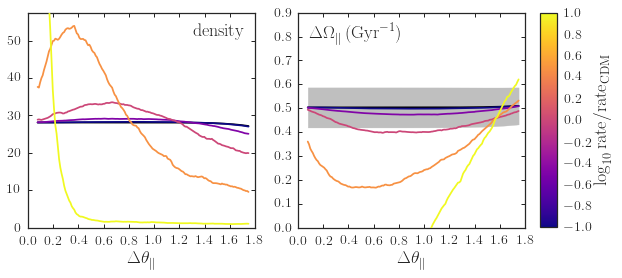

In [9]:
bovy_plot.bovy_print(axes_labelsize=18.,xtick_labelsize=14.,ytick_labelsize=14.)
cmap= cm.plasma
if save_figures:
    figsize(18/2.,4.25)
else:
    figsize(16/2.,4)
subplot(1,2,1)
plot_mean(os.path.join(basefilename_pal5,'pal5_t64sampling_X10_cdmp1_6-9_dens.dat'),
          fill=False,smooth=True,
          color=color_from_colormap(-1.,cmap,-1.,1.))
plot_mean(os.path.join(basefilename_pal5,'pal5_t64sampling_X10_cdmp33_6-9_dens.dat'),
          fill=False,
          color=color_from_colormap(numpy.log10(0.333333333),cmap,-1.,1.))
plot_mean(os.path.join(basefilename_pal5,'pal5_t64sampling_X10_6-9_dens.dat'),
          fill=False,
          color=color_from_colormap(0,cmap,-1.,1.))
plot_mean(os.path.join(basefilename_pal5,'pal5_t64sampling_X10_cdm3_6-9_dens.dat'),
          fill=False,
          color=color_from_colormap(numpy.log10(3.),cmap,-1.,1.))
plot_mean(os.path.join(basefilename_pal5,'pal5_t64sampling_X10_cdm10_6-9_dens.dat'),
          fill=False,
          color=color_from_colormap(1.,cmap,-1.,1.))
subplot(1,2,2)
plot_mean(os.path.join(basefilename_pal5,'pal5_t64sampling_X10_cdmp1_6-9_omega.dat'),
          fill=False,smooth=True,
          color=color_from_colormap(-1.,cmap,-1.,1.))
plot_mean(os.path.join(basefilename_pal5,'pal5_t64sampling_X10_cdmp33_6-9_omega.dat'),
          fill=False,
          color=color_from_colormap(numpy.log10(0.333333333),cmap,-1.,1.))
plot_mean(os.path.join(basefilename_pal5,'pal5_t64sampling_X10_6-9_omega.dat'),
          fill=False,
          color=color_from_colormap(0,cmap,-1.,1.))
plot_mean(os.path.join(basefilename_pal5,'pal5_t64sampling_X10_cdm3_6-9_omega.dat'),
          fill=False,
          color=color_from_colormap(numpy.log10(3.),cmap,-1.,1.))
plot_mean(os.path.join(basefilename_pal5,'pal5_t64sampling_X10_cdm10_6-9_omega.dat'),
          fill=False,
          color=color_from_colormap(1.,cmap,-1.,1.))
set_ranges_and_labels(extended=True,pal5=True)
if not save_figures: tight_layout()
add_colorbar(-1.,1.,r'$\log_{10} \mathrm{rate}/\mathrm{rate}_{\mathrm{CDM}}$',save_figures=save_figures)
if save_figures:
    bovy_plot.bovy_end_print(os.path.join(os.getenv('PAPERSDIR'),'2016-stream-stats','pal5_mean_multcdm.pdf'))